This notebook is used for the data analysis of the experiment "Optitrack and Leap swarm control"

I saved the values of the metrics computed by the mapping algorithm

In [275]:
data_folder = '..\\data_analysis\\data_analysis\\EXPERIMENT_PILOTS\\VALUES_STORED'

In [276]:
# needed to use modules/scripts from parent folder
import os,sys
print(sys.version)
sys.path.insert(1, os.path.join(sys.path[0], 'C:\\github\\HRI_mapping\\src'))

import HRI_mapping as HRI
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from settings.settings import get_settings
import sys
import json
import os
from matplotlib.backends.backend_pdf import PdfPages

3.6.6 |Anaconda, Inc.| (default, Jun 28 2018, 11:27:44) [MSC v.1900 64 bit (AMD64)]


In [277]:
# Not sure I even use that anymore
settings = get_settings()

In [278]:
datas_leap = [f for f in os.listdir(data_folder) if 'leap' in f]

In [279]:
# Get the data we saved from the experiments, especially the coefficients (correlation or correlation*SNR) for each subject and swarm maneuver

coeff = {}
for i,folder in enumerate(datas_leap):
    file_coeff_name = os.path.join(data_folder,folder,'coeff.json')     #for using corr * SNR
    # file_coeff_name = os.path.join(data_folder,folder,'covar.json')      # for using only the correlation
    with open(file_coeff_name) as file_coeff:
        coeff_data = json.load(file_coeff)
    coeff[i] = coeff_data

In [280]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='left', va='bottom')

In [281]:
def multipage(filename, figs=None, dpi=200):
    pp = PdfPages(filename)
    if figs is None:
        figs = [plt.figure(n) for n in plt.get_fignums()]
    for fig in figs:
        fig.savefig(pp, format='pdf')
    pp.close()

In [282]:
# This was used for the previous figures we had.
# Cells bellow works for the new ones
# Not used anymore

#coeff_mean = {}
#coeff_std = {}
#for out in coeff[0].keys():
#    coeff_mean[out] = {}
#    coeff_std[out] = {}
#    for input_feat in coeff[0][out].keys():
#        list_feat_values = []
#        for subject in range(len(datas_leap)):
#            if np.sum(list(coeff[subject][out].values())) != 0:
#                list_feat_values.append(coeff[subject][out][input_feat]/np.sum(list(coeff[subject][out].values())))
#            else:
#                list_feat_values.append(0)
#        coeff_mean[out][input_feat] = np.mean(list_feat_values)
#        coeff_std[out][input_feat] = np.std(list_feat_values)

In [283]:
# Parameters to tune

thresh = 0.5         # Threshold : x% of the coefficients
n_selected_features = 5    # The maximum number of features we will add to reach the threshold (can be high)  
n_selected = 10       # How much input feats we want to plot

In [284]:
drop_columns = [str(integ)+str(x)+'_1_'+str(i) for x in ['roll','pitch','yaw'] for i in [4,8,12,16,20] for integ in ['','int_']]
drop_columns.extend([str(integ)+str(x)+'_2_'+str(i) for x in ['roll','pitch','yaw'] for i in [4,8,12,16,20] for integ in ['','int_']])

for s in coeff.keys():
    for o in coeff[s].keys():
        for col in drop_columns:
            del coeff[s][o][col]

In [285]:
# This cell computes which features account together for more than x% of the coefficient 

coef_sum = {}   # Creates and initialize the dict
for subject in range(len(datas_leap)):
    coef_sum[subject] = {}
    for out in coeff[0].keys():
        coef_sum[subject][out] = {}
        for input_feat in coeff[0][out].keys():
            coef_sum[subject][out][input_feat] = 0

for out in list(coeff[0].keys())[:-1]:
    for subject in range(len(datas_leap)):
        # These lines sort the features according to their coeff values (features for a specific subject and swarm motion)
        ind = np.argpartition(list(coeff[subject][out].values()), -n_selected_features)[-n_selected_features:]
        ind = ind[np.argsort(-np.array([list(coeff[subject][out].values())[i] for i in ind]))] # To sort the array in descending order
        name_ind = np.array(list(coeff[subject][out].keys()))[ind]
        
        coeff_data = [coeff[subject][out][n]/np.sum(list(coeff[subject][out].values())) for n in name_ind] # Coefficients values
        
        cumul_data = np.cumsum(coeff_data)   # Cumulative sum
        selected_indexes = np.where(cumul_data<thresh)[0]     # Apply the threshold
        
        if len(selected_indexes) == 0:
            selected_indexes = [-1]     # Will allow to select index 0 at next line
            
        for index in range(selected_indexes[-1]+2):    # This line is a bit strange... if selected_indexes=[0,1,2] I want to look at indexes 0,1,2 and 3 (due to how threshold is applied)
            if index < n_selected_features:
                input_feat = name_ind[index]
                coef_sum[subject][out][input_feat] += 1      # We add one for each parameter selected
                print(out, subject, input_feat)
        print(np.max(list(coef_sum[subject][out].values())))
print(coef_sum)

input1 0 int_pos_x_1_1
1
input1 1 pos_x_1_1
1
input1 2 pos_x_1_1
1
input1 3 pos_x_2_1
input1 3 pos_x_1_1
input1 3 int_pos_x_1_1
input1 3 int_pos_x_2_1
input1 3 pos_x_1_16
1
input1 4 pos_x_1_1
1
input1 5 int_pos_y_1_8
input1 5 int_roll_1_1
input1 5 int_pos_y_1_12
input1 5 int_pos_x_1_1
input1 5 int_pos_y_1_16
1
input1 6 pos_x_1_1
1
input1 7 pos_x_1_1
1
input1 8 pos_x_1_1
1
input1 9 int_roll_2_1
input1 9 int_pos_y_1_1
1
input2 0 int_pos_z_2_1
input2 0 pos_z_2_1
input2 0 int_pos_y_2_1
1
input2 1 pos_y_1_1
1
input2 2 pos_y_1_1
1
input2 3 pos_y_1_1
input2 3 pos_y_2_1
1
input2 4 pos_y_1_1
1
input2 5 pos_y_1_1
1
input2 6 pos_y_1_1
1
input2 7 pos_y_1_1
1
input2 8 pos_y_1_1
1
input2 9 int_pos_y_1_1
1
input3 0 int_pos_z_1_1
1
input3 1 pos_z_1_1
1
input3 2 pos_z_1_1
input3 2 pos_y_1_1
1
input3 3 pos_z_1_1
input3 3 pos_z_2_1
1
input3 4 pos_z_1_1
1
input3 5 int_yaw_1_1
input3 5 int_pos_y_1_16
input3 5 int_pos_y_1_12
input3 5 int_pos_z_1_4
input3 5 int_pos_y_1_20
1
input3 6 pos_z_1_1
1
input3 7 pos_

['input1', 'input2', 'input3', 'input4']


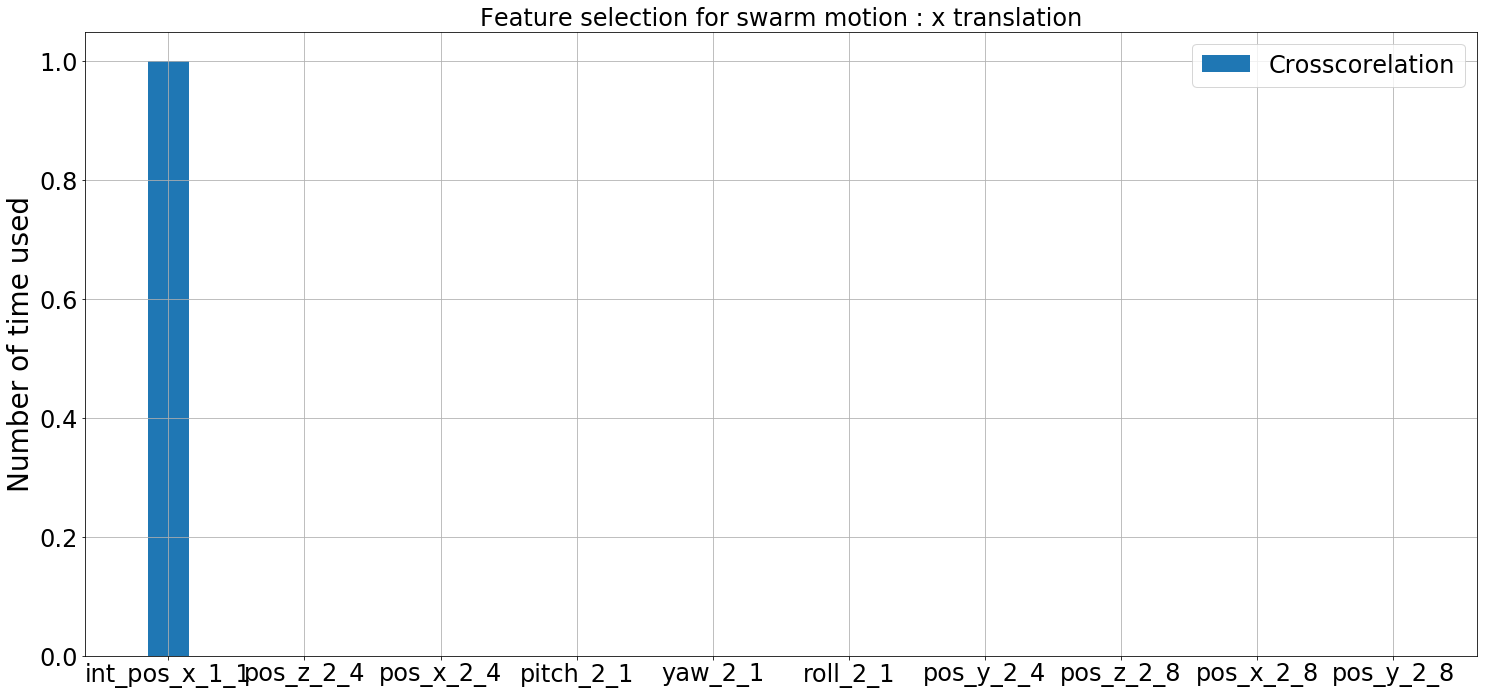

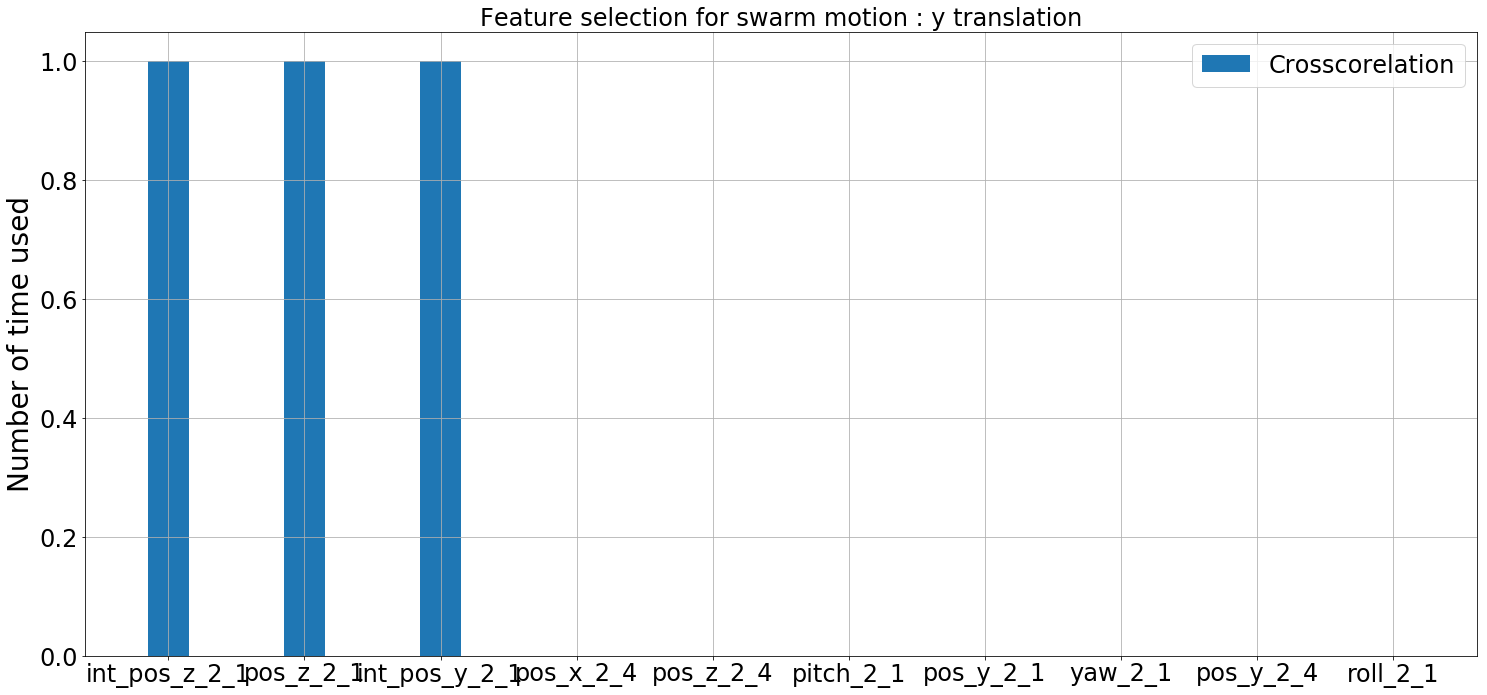

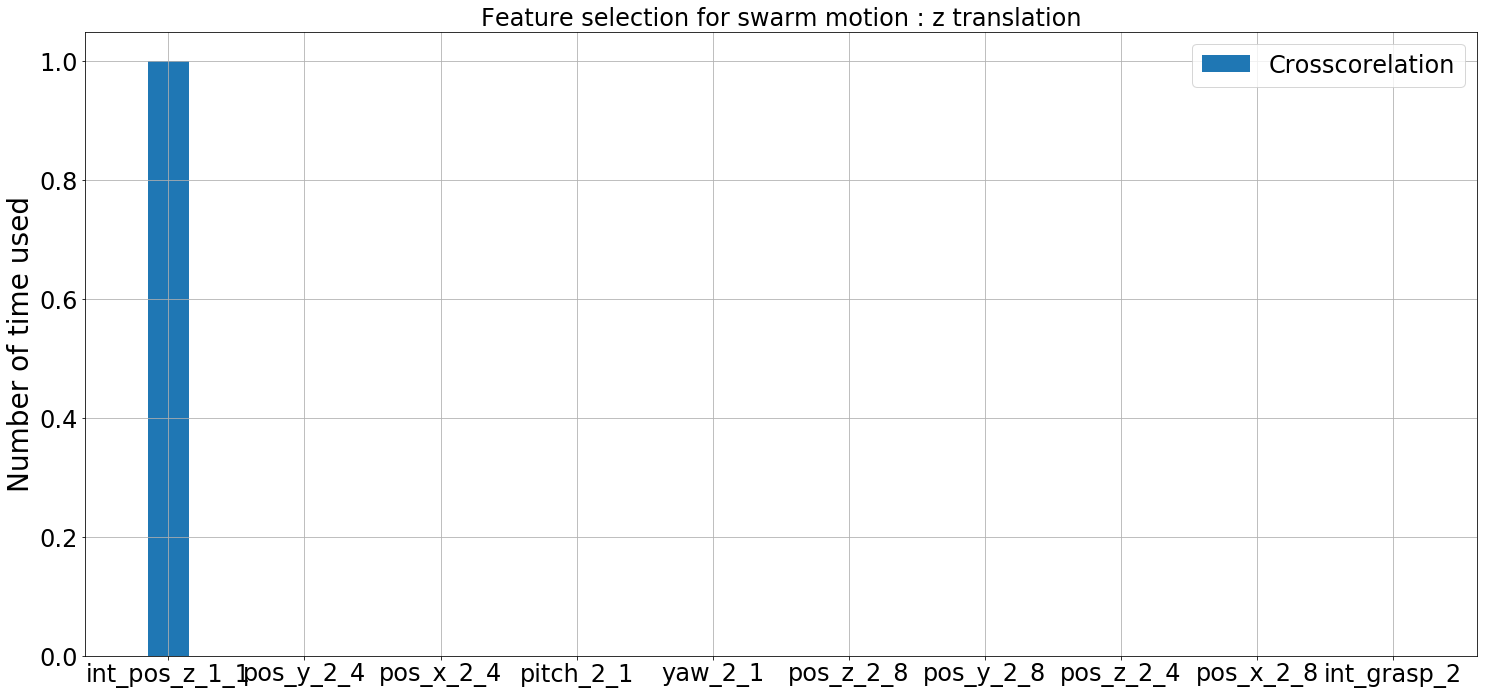

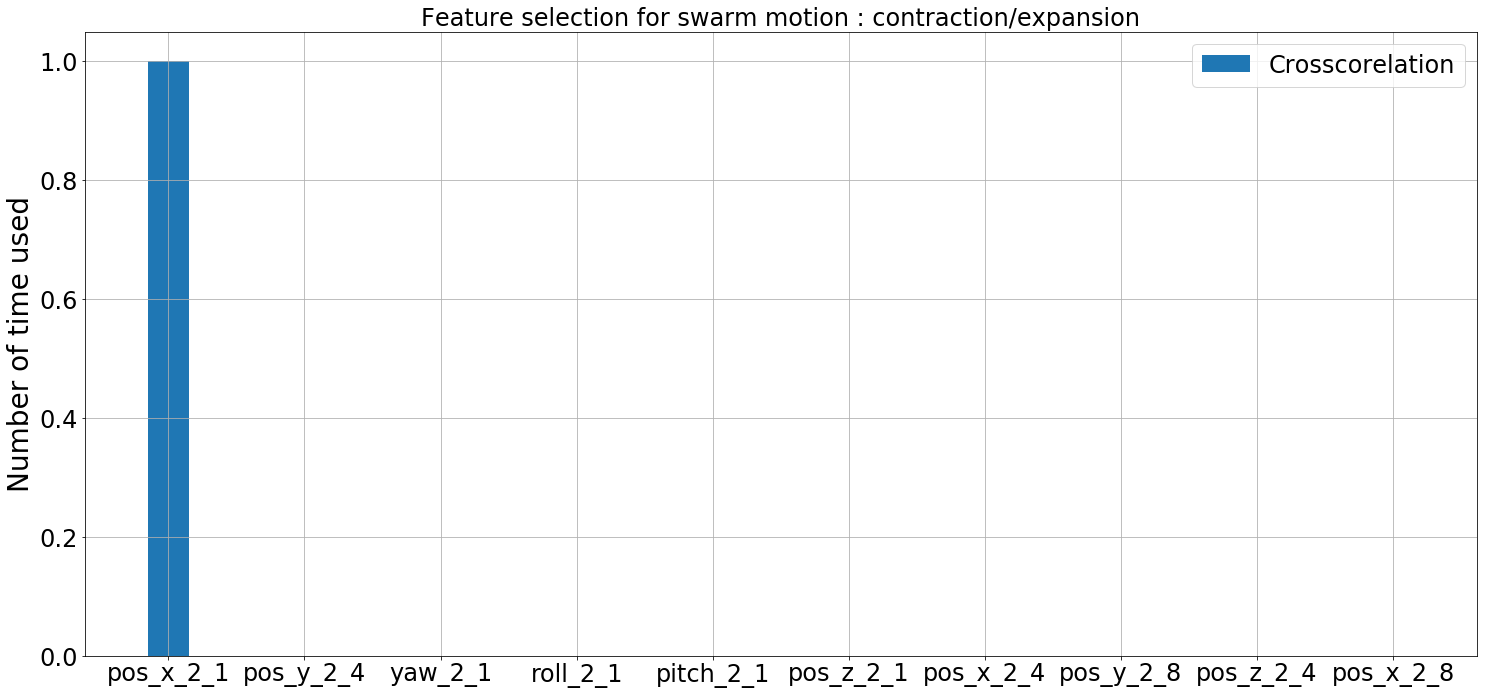

In [286]:
plt.rcParams.update({'font.size': 18})
outputs_labels = ['x translation', 'y translation', 'z translation', 'contraction/expansion']
print(list(coeff[0].keys())[:-1])
for i,out in enumerate(list(coeff[0].keys())[:-1]):
    ind = np.argpartition(list(coef_sum[0][out].values()), -n_selected)[-n_selected:]
    #ind = ind[np.argsort([list(coeff_mean[out].values())[i] for i in ind])] # To sort the array in ascending order
    ind = ind[np.argsort(-np.array([list(coef_sum[0][out].values())[i] for i in ind]))] # To sort the array in descending order
    name_ind = np.array(list(coef_sum[0][out].keys()))[ind]
    labels = name_ind
    coeff_data = [coef_sum[0][out][n] for n in name_ind]

    x = np.arange(len(labels))  # the label locations
    width = 0.3  # the width of the bars

    fig, ax = plt.subplots(figsize=(2.1*n_selected,10))
    rects1 = ax.bar(x, coeff_data, width, label='Crosscorelation', capsize=10)
    #rects2 = ax.bar(x + width/2, snr_means, width, yerr=snrStd, label='SNR')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Number of time used')
    ax.set_title('Feature selection for swarm motion : '+outputs_labels[i])
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    #autolabel(rects1)
    #autolabel(rects2)

    fig.tight_layout()
    plt.grid()
    plt.show()

In [287]:
all_subjects_lists = []

print(coef_sum[1]['input1']['pos_x_1_1']) # 1
print(np.sum([coef_sum[1]['input1']['pos_'+str(x)+'_1_1'] for x in ['x','y','z']])) # 1

for subject in range(len(datas_leap)):
    subjects_list = {}

    list_right_hand = {}
    list_left_hand = {}
    list_int_right_hand = {}
    list_int_left_hand = {}

    for maneuver in coef_sum[subject].keys():
        list_right_hand[maneuver] = {}
        list_left_hand[maneuver] = {}
        list_int_right_hand[maneuver] = {}
        list_int_left_hand[maneuver] = {}
        
        # Palm features :
        list_right_hand[maneuver]["palm"] = min(1,np.sum([coef_sum[subject][maneuver]['pos_'+str(x)+'_1_1'] for x in ['x','y','z']]))
        list_left_hand[maneuver]["palm"] = min(1,np.sum([coef_sum[subject][maneuver]['pos_'+str(x)+'_2_1'] for x in ['x','y','z']]))
        list_int_right_hand[maneuver]["palm"] = min(1,np.sum([coef_sum[subject][maneuver]['int_pos_'+str(x)+'_1_1']for x in ['x','y','z']]))
        list_int_left_hand[maneuver]["palm"] = min(1,np.sum([coef_sum[subject][maneuver]['int_pos_'+str(x)+'_2_1'] for x in ['x','y','z']]))

        if subject == 1 and maneuver == 'input1':
            print("Here")
            print(list_right_hand[maneuver]["palm"])
        
        # Palm rotation features :
        list_right_hand[maneuver]["palm_rot"] = min(1,np.sum([coef_sum[subject][maneuver][str(x)+'_1_1'] for x in ['roll','pitch','yaw']]))
        list_left_hand[maneuver]["palm_rot"] = min(1,np.sum([coef_sum[subject][maneuver][str(x)+'_2_1'] for x in ['roll','pitch','yaw']]))
        list_int_right_hand[maneuver]["palm_rot"] = min(1,np.sum([coef_sum[subject][maneuver]['int_'+str(x)+'_1_1'] for x in ['roll','pitch','yaw']]))
        list_int_left_hand[maneuver]["palm_rot"] = min(1,np.sum([coef_sum[subject][maneuver]['int_'+str(x)+'_2_1'] for x in ['roll','pitch','yaw']]))

        # Finger 1 features :
        list_right_hand[maneuver]["finger 1"] = min(1,np.sum([coef_sum[subject][maneuver]['pos_'+str(x)+'_1_4'] for x in ['x','y','z']]))
        list_left_hand[maneuver]["finger 1"] = min(1,np.sum([coef_sum[subject][maneuver]['pos_'+str(x)+'_2_4'] for x in ['x','y','z']]))
        list_int_right_hand[maneuver]["finger 1"] = min(1,np.sum([coef_sum[subject][maneuver]['int_pos_'+str(x)+'_1_4'] for x in ['x','y','z']]))
        list_int_left_hand[maneuver]["finger 1"] = min(1,np.sum([coef_sum[subject][maneuver]['int_pos_'+str(x)+'_2_4'] for x in ['x','y','z']]))

        # Finger 2 features :
        list_right_hand[maneuver]["finger 2"] = min(1,np.sum([coef_sum[subject][maneuver]['pos_'+str(x)+'_1_8'] for x in ['x','y','z']]))
        list_left_hand[maneuver]["finger 2"] = min(1,np.sum([coef_sum[subject][maneuver]['pos_'+str(x)+'_2_8'] for x in ['x','y','z']]))
        list_int_right_hand[maneuver]["finger 2"] = min(1,np.sum([coef_sum[subject][maneuver]['int_pos_'+str(x)+'_1_8'] for x in ['x','y','z']]))
        list_int_left_hand[maneuver]["finger 2"] = min(1,np.sum([coef_sum[subject][maneuver]['int_pos_'+str(x)+'_2_8'] for x in ['x','y','z']]))

        # Finger 3 features :
        list_right_hand[maneuver]["finger 3"] = min(1,np.sum([coef_sum[subject][maneuver]['pos_'+str(x)+'_1_12'] for x in ['x','y','z']]))
        list_left_hand[maneuver]["finger 3"] = min(1,np.sum([coef_sum[subject][maneuver]['pos_'+str(x)+'_2_12'] for x in ['x','y','z']]))
        list_int_right_hand[maneuver]["finger 3"] = min(1,np.sum([coef_sum[subject][maneuver]['int_pos_'+str(x)+'_1_12'] for x in ['x','y','z']]))
        list_int_left_hand[maneuver]["finger 3"] = min(1,np.sum([coef_sum[subject][maneuver]['int_pos_'+str(x)+'_2_12'] for x in ['x','y','z']]))

        # Finger 4 features :
        list_right_hand[maneuver]["finger 4"] = min(1,np.sum([coef_sum[subject][maneuver]['pos_'+str(x)+'_1_16'] for x in ['x','y','z']]))
        list_left_hand[maneuver]["finger 4"] = min(1,np.sum([coef_sum[subject][maneuver]['pos_'+str(x)+'_2_16'] for x in ['x','y','z']]))
        list_int_right_hand[maneuver]["finger 4"] = min(1,np.sum([coef_sum[subject][maneuver]['int_pos_'+str(x)+'_1_16'] for x in ['x','y','z']]))
        list_int_left_hand[maneuver]["finger 4"] = min(1,np.sum([coef_sum[subject][maneuver]['int_pos_'+str(x)+'_2_16'] for x in ['x','y','z']]))

        # Finger 5 features :
        list_right_hand[maneuver]["finger 5"] = min(1,np.sum([coef_sum[subject][maneuver]['pos_'+str(x)+'_1_20'] for x in ['x','y','z']]))
        list_left_hand[maneuver]["finger 5"] = min(1,np.sum([coef_sum[subject][maneuver]['pos_'+str(x)+'_2_20'] for x in ['x','y','z']]))
        list_int_right_hand[maneuver]["finger 5"] = min(1,np.sum([coef_sum[subject][maneuver]['int_pos_'+str(x)+'_1_20'] for x in ['x','y','z']]))
        list_int_left_hand[maneuver]["finger 5"] = min(1,np.sum([coef_sum[subject][maneuver]['int_pos_'+str(x)+'_2_20'] for x in ['x','y','z']]))

        # grasp features :
        list_right_hand[maneuver]["grasp"] = min(1,np.sum([coef_sum[subject][maneuver]['grasp_1']]))
        list_left_hand[maneuver]["grasp"] = min(1,np.sum([coef_sum[subject][maneuver]['grasp_2']]))
        list_int_right_hand[maneuver]["grasp"] = min(1,np.sum([coef_sum[subject][maneuver]['int_grasp_1']]))
        list_int_left_hand[maneuver]["grasp"] = min(1,np.sum([coef_sum[subject][maneuver]['int_grasp_2']]))
        
    subjects_list["list_right_hand"] = list_right_hand
    subjects_list["list_left_hand"] = list_left_hand
    subjects_list["list_int_right_hand"] = list_int_right_hand
    subjects_list["list_int_left_hand"] = list_int_left_hand

    all_subjects_lists.append(subjects_list)
print(all_subjects_lists[0]["list_right_hand"])
print('\n')
print(all_subjects_lists[0]["list_int_right_hand"])
print('\n')
print(all_subjects_lists[1]["list_right_hand"])

1
1
Here
1
{'input1': {'palm': 0, 'palm_rot': 0, 'finger 1': 0, 'finger 2': 0, 'finger 3': 0, 'finger 4': 0, 'finger 5': 0, 'grasp': 0}, 'input2': {'palm': 0, 'palm_rot': 0, 'finger 1': 0, 'finger 2': 0, 'finger 3': 0, 'finger 4': 0, 'finger 5': 0, 'grasp': 0}, 'input3': {'palm': 0, 'palm_rot': 0, 'finger 1': 0, 'finger 2': 0, 'finger 3': 0, 'finger 4': 0, 'finger 5': 0, 'grasp': 0}, 'input4': {'palm': 0, 'palm_rot': 0, 'finger 1': 0, 'finger 2': 0, 'finger 3': 0, 'finger 4': 0, 'finger 5': 0, 'grasp': 0}, 'input5': {'palm': 0, 'palm_rot': 0, 'finger 1': 0, 'finger 2': 0, 'finger 3': 0, 'finger 4': 0, 'finger 5': 0, 'grasp': 0}}


{'input1': {'palm': 1, 'palm_rot': 0, 'finger 1': 0, 'finger 2': 0, 'finger 3': 0, 'finger 4': 0, 'finger 5': 0, 'grasp': 0}, 'input2': {'palm': 0, 'palm_rot': 0, 'finger 1': 0, 'finger 2': 0, 'finger 3': 0, 'finger 4': 0, 'finger 5': 0, 'grasp': 0}, 'input3': {'palm': 1, 'palm_rot': 0, 'finger 1': 0, 'finger 2': 0, 'finger 3': 0, 'finger 4': 0, 'finger 5': 0

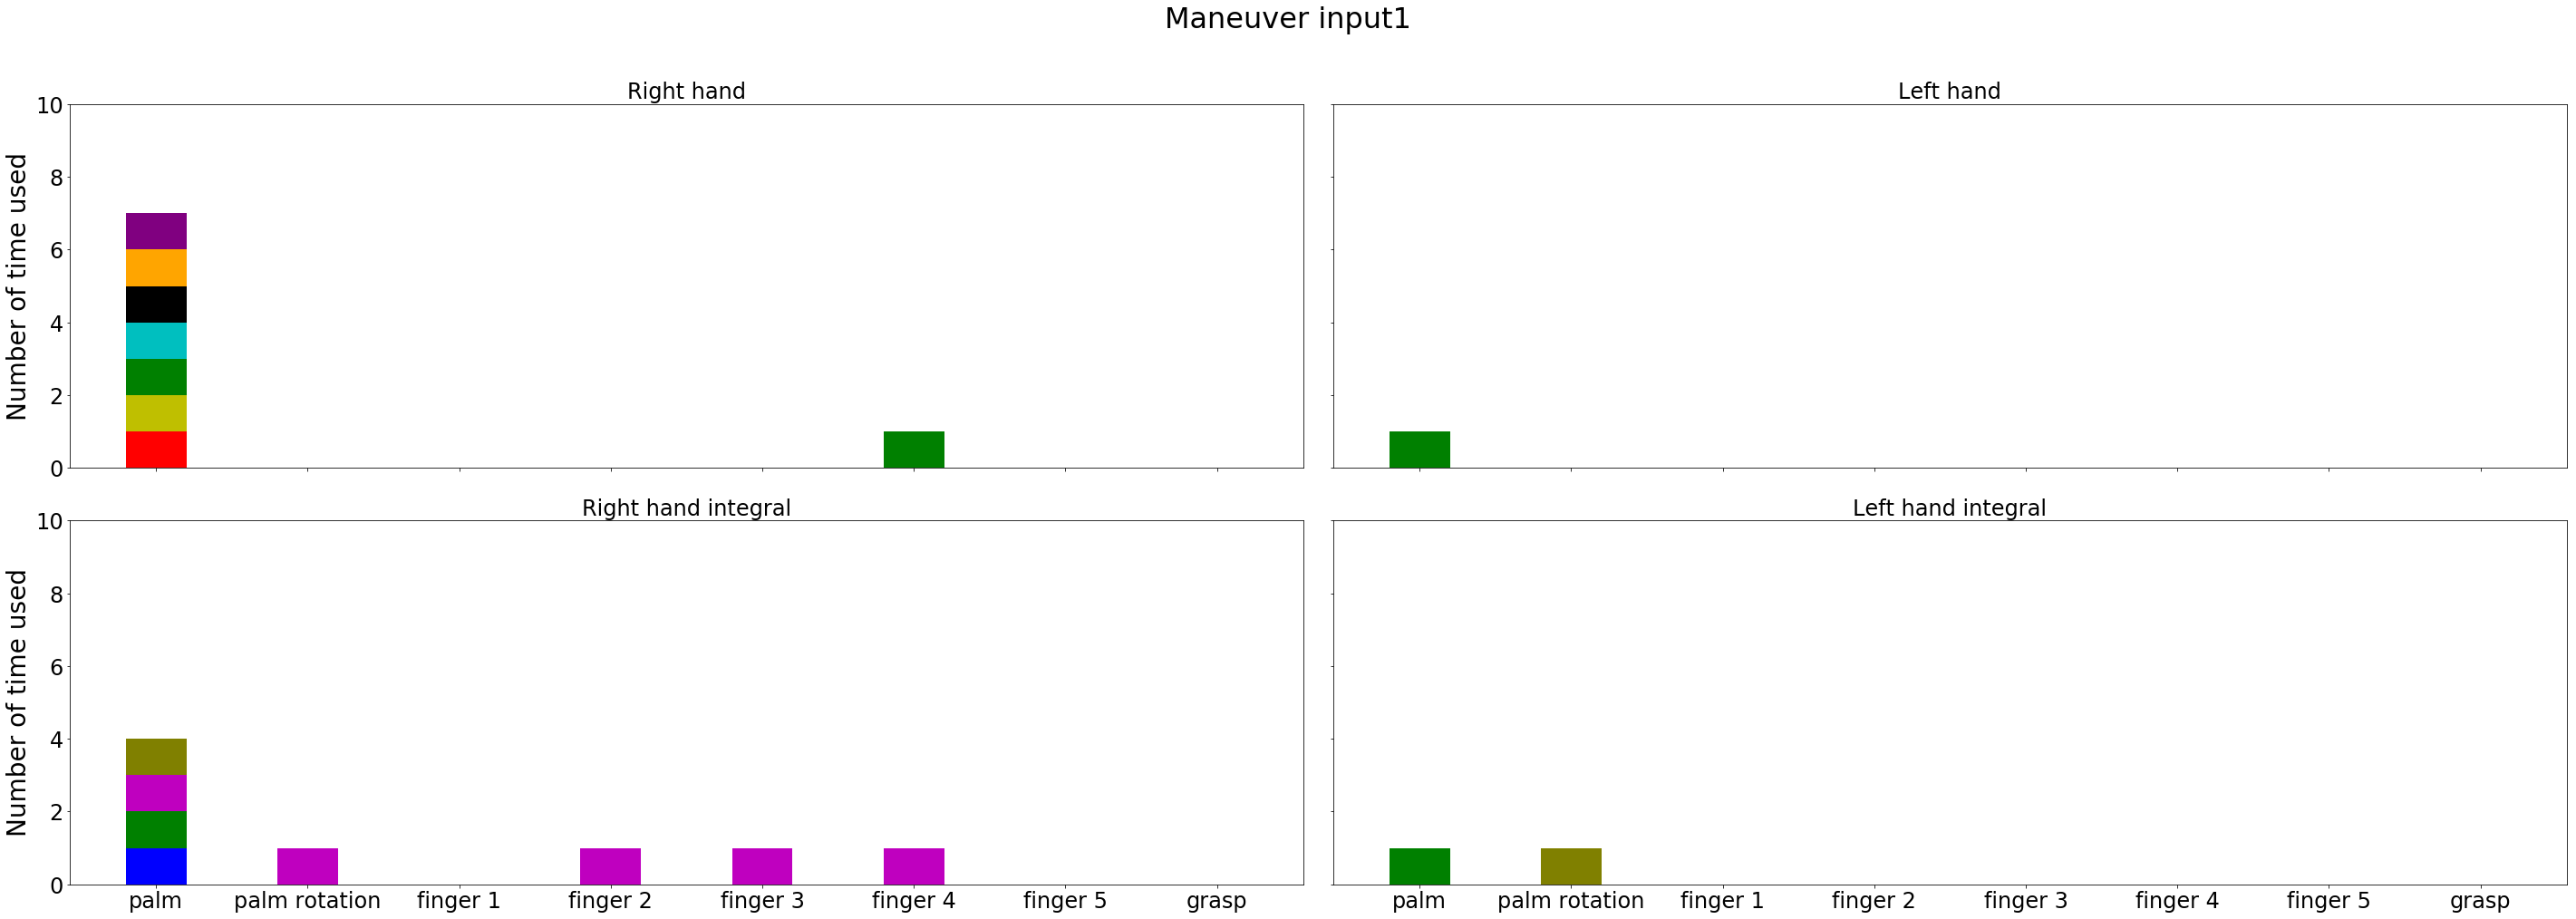

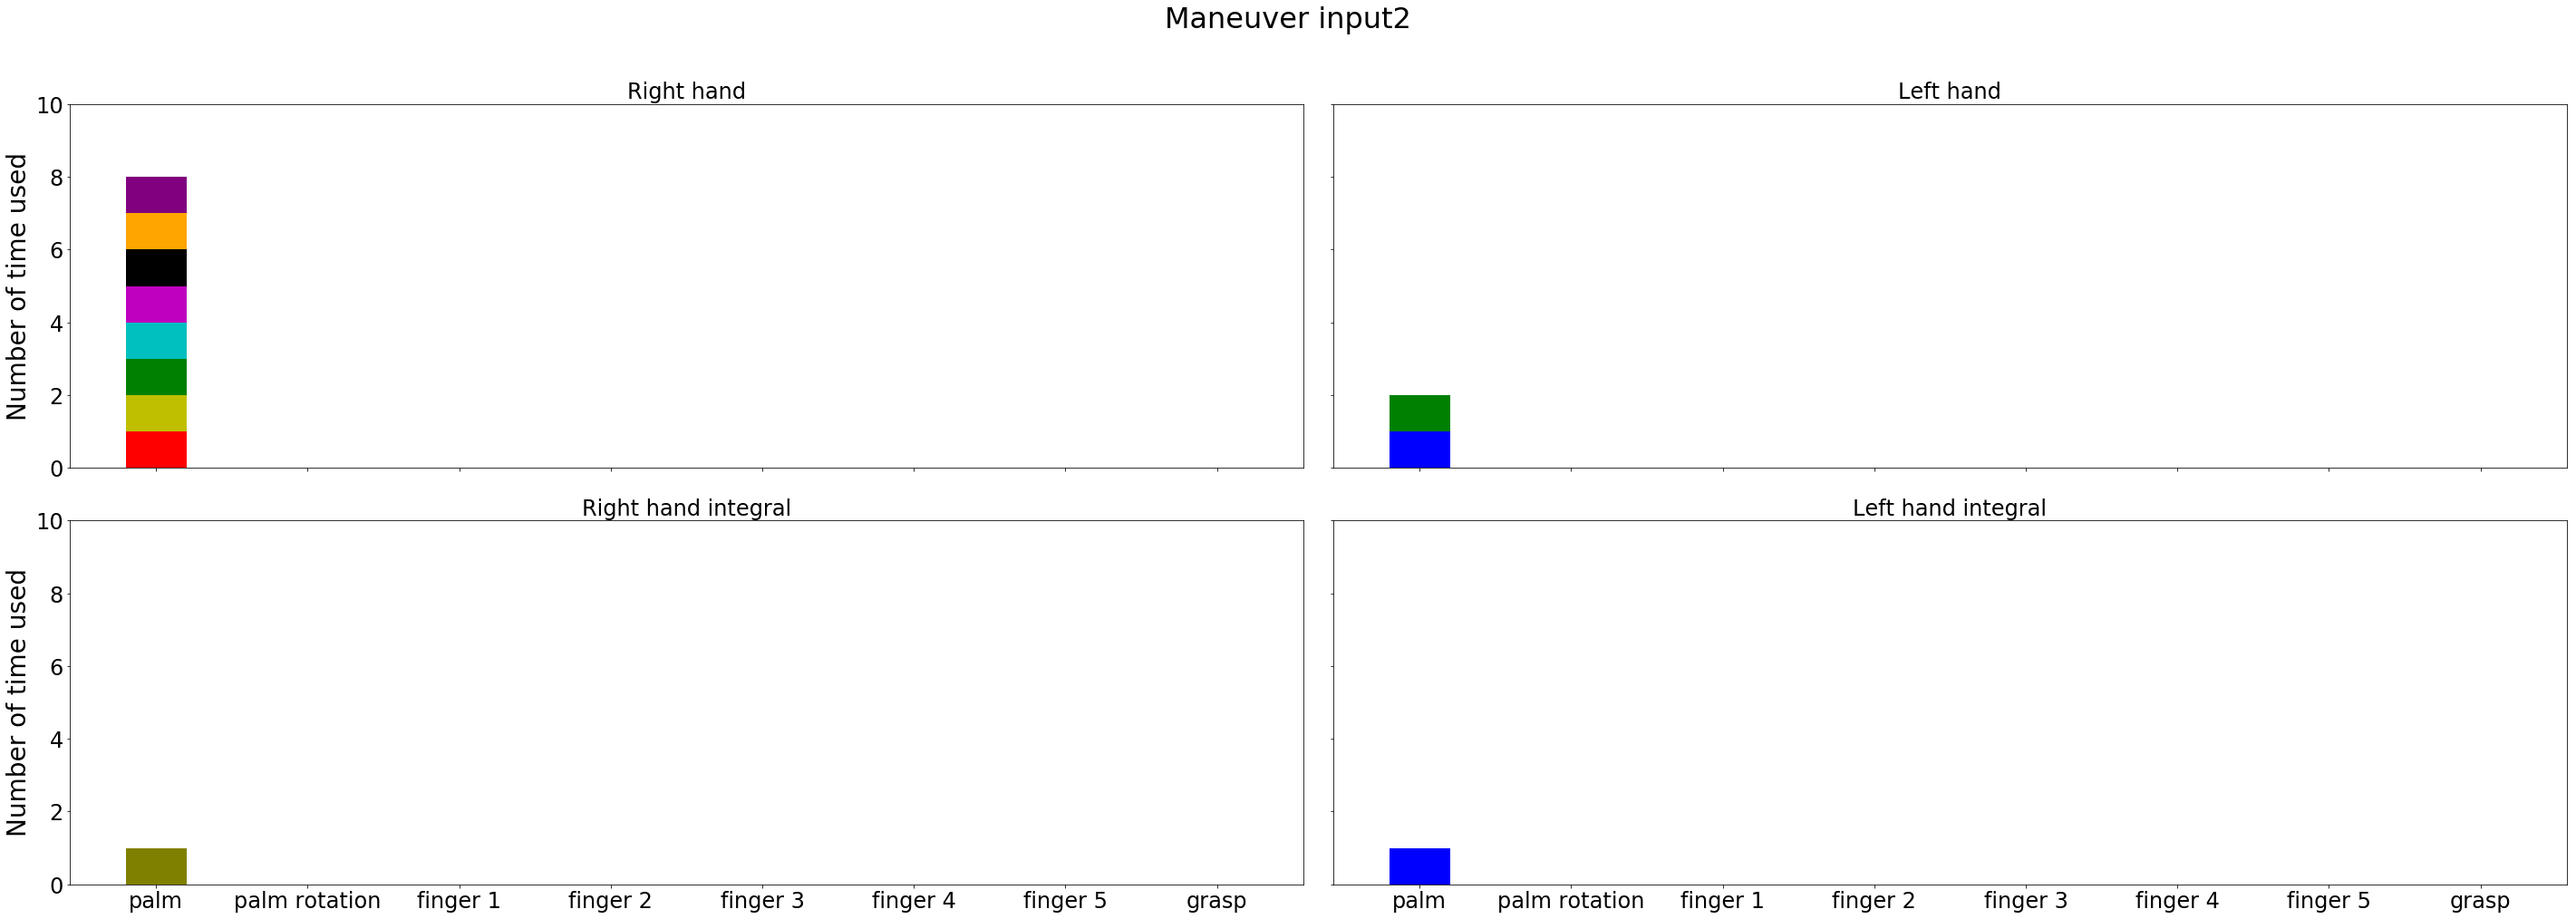

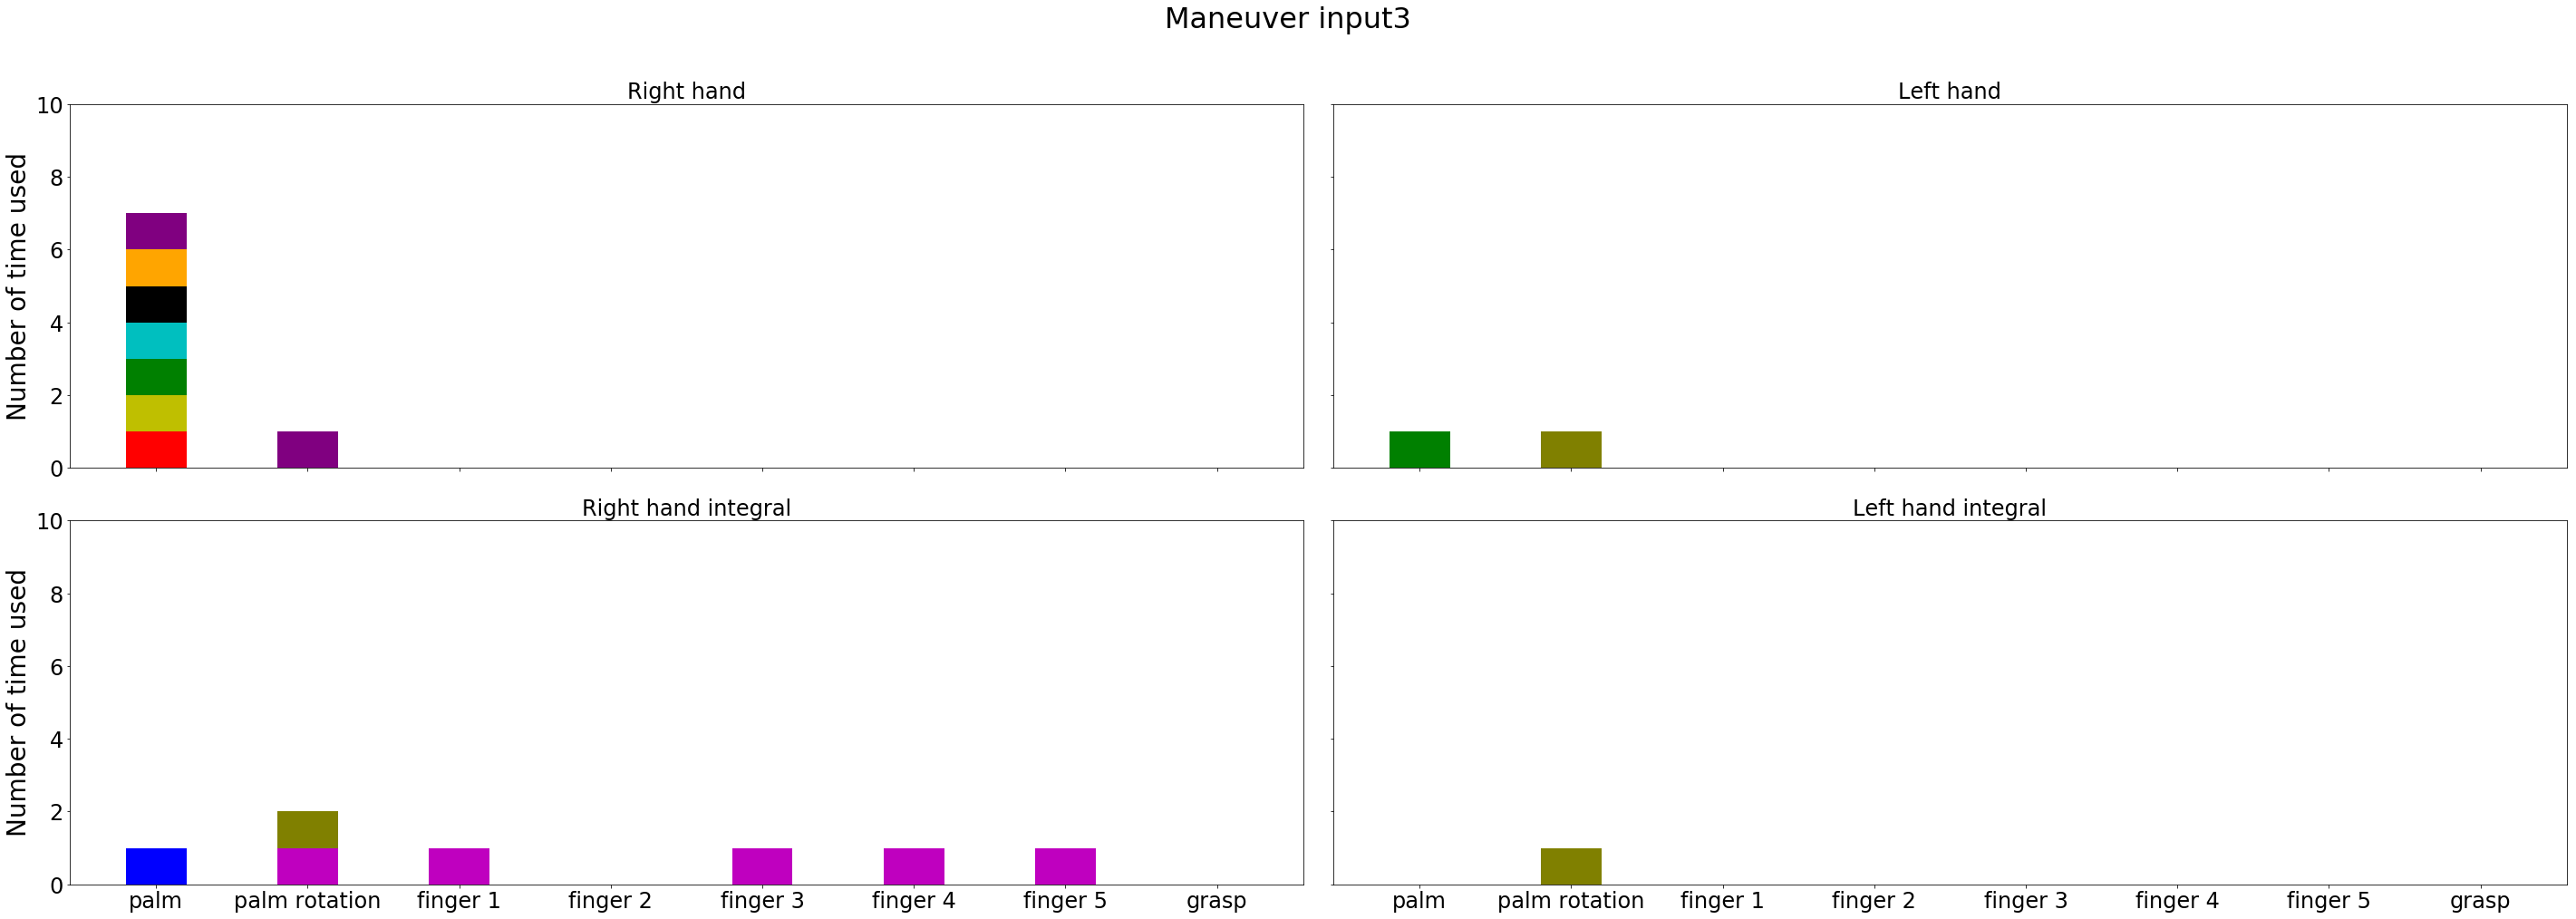

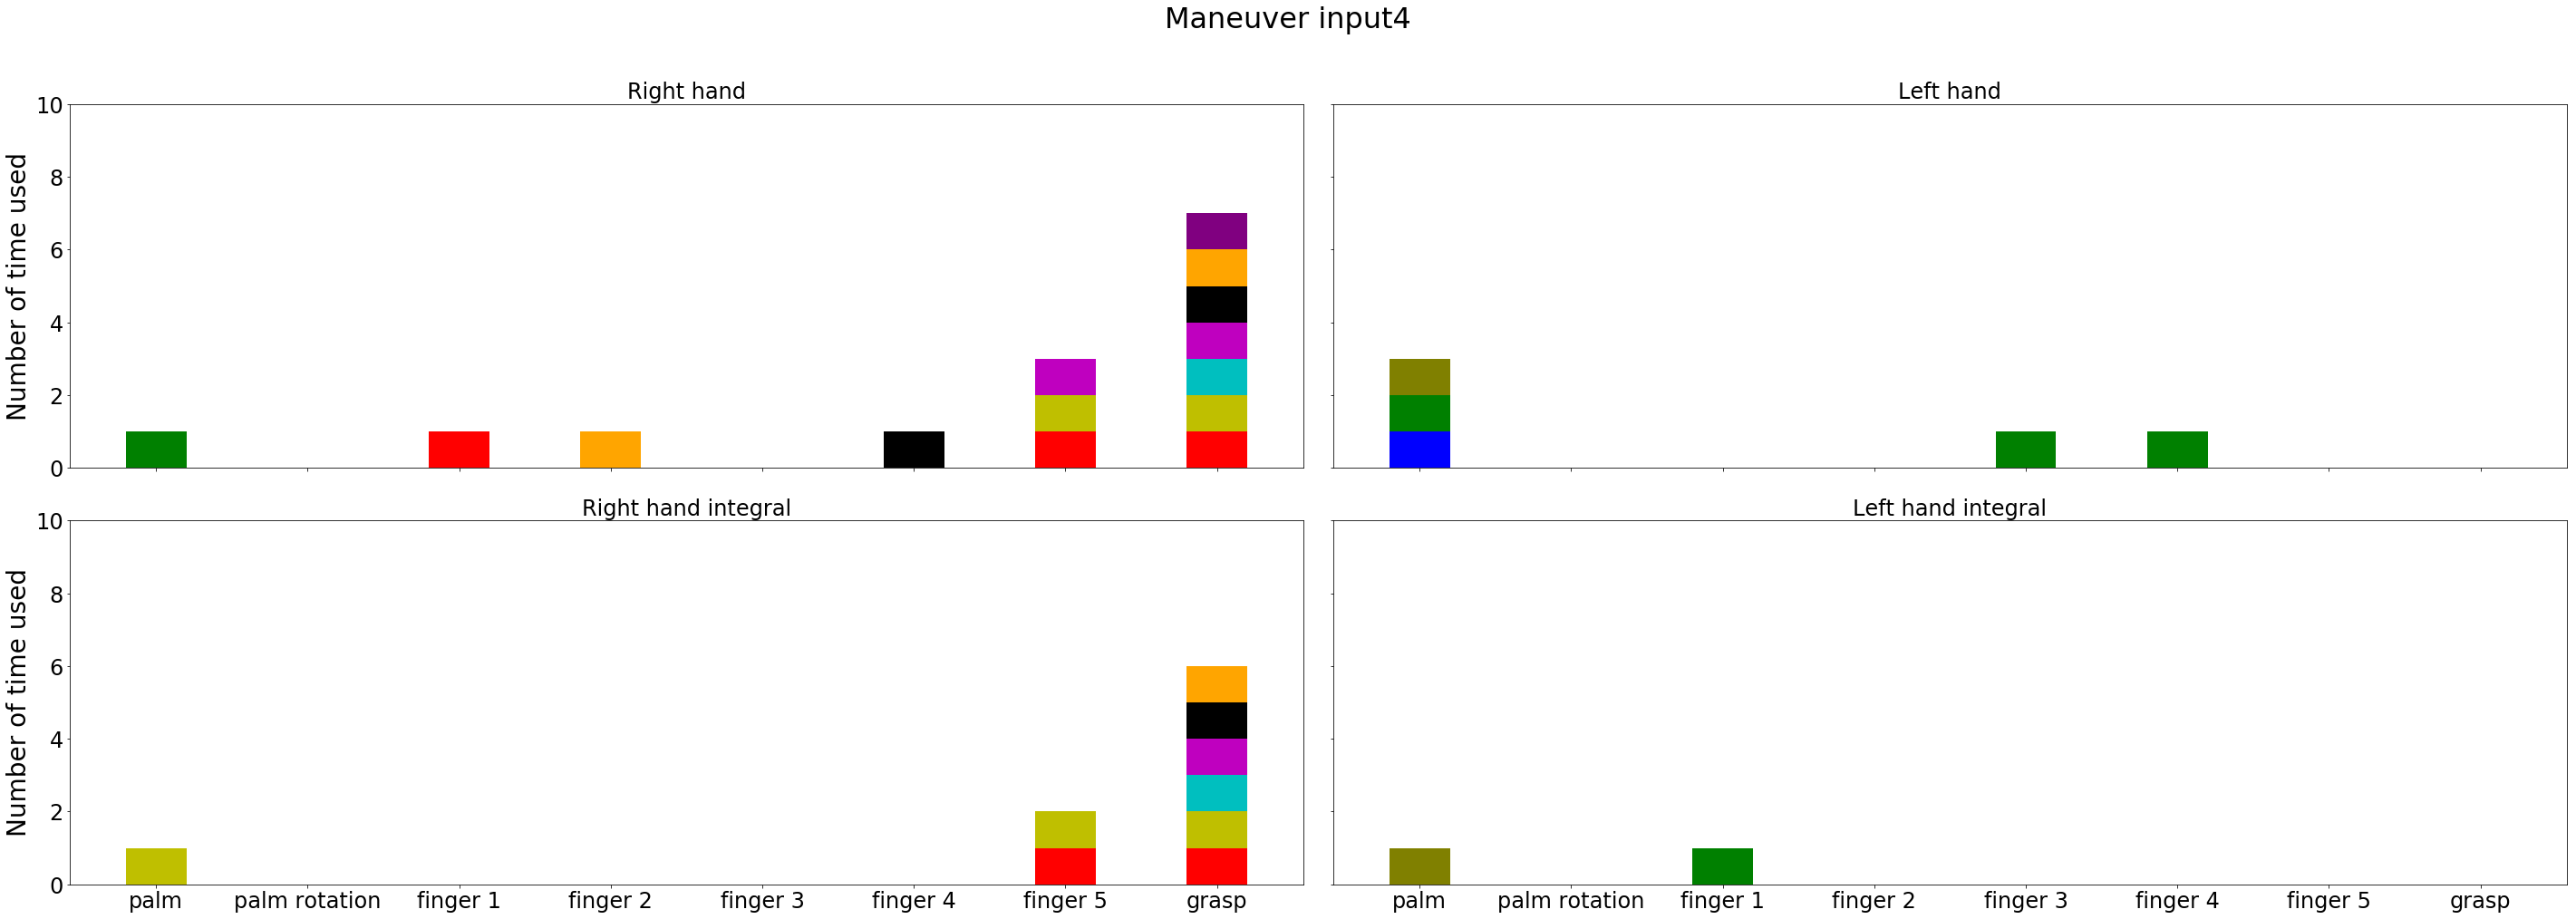

In [288]:
SMALL_SIZE = 24
MEDIUM_SIZE = 28
BIGGER_SIZE = 36

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

features_names = ['palm', 'palm rotation', 'finger 1', 'finger 2', 'finger 3', 'finger 4', 'finger 5', 'grasp']

x = np.arange(len(features_names))  # the label locations
width = 0.4  # the width of the bars

maneuvers = list(coef_sum[0].keys())[:-1]
color = ['b','r','y','g','c','m','k','orange','purple', 'olive']

for man in maneuvers:
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, sharex=True, sharey=True, figsize=(5*len(features_names),15))
    st = fig.suptitle(f"Maneuver {man}", fontsize=32)
    for subject in range(0,len(datas_leap)):
        if subject == 0:
            base_rh = np.zeros_like(list(all_subjects_lists[subject]["list_right_hand"][man].values()))
        else:
            base_rh += np.array(list(all_subjects_lists[subject-1]["list_right_hand"][man].values()))
        rects1 = ax1.bar(x, list(all_subjects_lists[subject]["list_right_hand"][man].values()), width, color=color[subject], capsize=10, bottom=base_rh)
        ax1.set_ylabel('Number of time used')
        ax1.set_title('Right hand')
        ax1.set_xticks(x)
        ax1.set_xticklabels(features_names)
        fig.tight_layout()
        ax1.grid()
        ax1.set_ylim([0, 10])

        if subject == 0:
            base_lh = np.zeros_like(list(all_subjects_lists[subject]["list_left_hand"][man].values()))
        else:
            base_lh += np.array(list(all_subjects_lists[subject-1]["list_left_hand"][man].values()))
        rects1 = ax2.bar(x, list(all_subjects_lists[subject]["list_left_hand"][man].values()), width, color=color[subject], capsize=10, bottom=base_lh)
        #ax2.set_ylabel('Number of time used')
        ax2.set_title('Left hand')
        ax2.set_xticks(x)
        ax2.set_xticklabels(features_names)
        fig.tight_layout()
        ax2.grid()

        if subject == 0:
            base_irh = np.zeros_like(list(all_subjects_lists[subject]["list_int_right_hand"][man].values()))
        else:
            base_irh += np.array(list(all_subjects_lists[subject-1]["list_int_right_hand"][man].values()))
        rects1 = ax3.bar(x, list(all_subjects_lists[subject]["list_int_right_hand"][man].values()), width, color=color[subject], capsize=10, bottom=base_irh)
        # Add some text for labels, title and custom x-axis tick labels, etc.
        ax3.set_ylabel('Number of time used')
        ax3.set_title('Right hand integral')
        ax3.set_xticks(x)
        ax3.set_xticklabels(features_names)
        fig.tight_layout()
        ax3.grid()

        if subject == 0:
            base_ilh = np.zeros_like(list(all_subjects_lists[subject]["list_int_left_hand"][man].values()))
        else:
            base_ilh += np.array(list(all_subjects_lists[subject-1]["list_int_left_hand"][man].values()))
        rects1 = ax4.bar(x, list(all_subjects_lists[subject]["list_int_left_hand"][man].values()), width, color=color[subject], capsize=10, bottom=base_ilh)
        # Add some text for labels, title and custom x-axis tick labels, etc.
        #ax4.set_ylabel('Number of time used')
        ax4.set_title('Left hand integral')
        ax4.set_xticks(x)
        ax4.set_xticklabels(features_names)
        fig.tight_layout()
        ax4.grid()

                
    st.set_y(0.95)
    fig.subplots_adjust(top=0.85)
    
    plt.show()